In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from scipy import signal
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is B233-0680

 Directory of C:\data science\DATA ANALYSIS FINAL PROJECT

01-03-2024  13:46    <DIR>          .
06-03-2024  22:36    <DIR>          ..
01-03-2024  13:50    <DIR>          .ipynb_checkpoints
19-02-2024  08:33           111,593 EDA  .ipynb
27-02-2024  12:48           771,104 EDA new acc 1.ipynb
01-03-2024  13:46         2,224,305 Income data analysis.ipynb
26-02-2024  21:21           390,928 income.ipynb
16-02-2024  11:24         3,844,217 incomeData.csv.xls
28-02-2024  17:50         4,343,637 IncomePowerBI.pbix
29-02-2024  11:05         4,054,046 income_cleaned.csv
               7 File(s)     15,739,830 bytes
               3 Dir(s)  209,092,763,648 bytes free


In [3]:
df = pd.read_csv("incomeData.csv.xls")

In [4]:
df

,nan,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df = df.drop(columns="nan")

In [6]:
df

,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


now we drop the the column which is not needed 

- AGE : continuous. It denotes the age of the person.
- WORK-CLASS: It denotes the working class of the 
person. Sample values: Private, Self-emp-not-inc, 
Self-emp-inc, Federal-gov, Local-gov, State-gov, 
Without-pay, Never-worked.
- FNLWGT : continuous.
- EDUCATION: It denotes the educational qualification 
of the person. Sample values: Bachelors, Somecollege, 11th, HS-grad, Prof-school, Assoc-acdm, 
Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 
10th, Doctorate, 5th-6th, Preschool.
- EDUCATION-NUM: continuous. It denotes the 
quantitative values with reference to education. 
- MARITAL-STATUS: It denotes the marital status of 
the person. Sample values: Married-civ-spouse, 
Divorced, Never-married, Separated, Widowed, 
Married-spouse-absent, Married-AF-spouse.
- OCCUPATION: It denotes the occupation of a person. 
Sample values: Tech-support, Craft-repair, Otherservice, Sales, Exec-managerial, Prof-specialty, 
Handlers-cleaners, Machine-op-inspct, Adm-clerical, 
Farming-fishing, Transport-moving, Priv-house-serv, 
Protective-serv, Armed-Forces.
- RELATIONSHIP: It denotes the people present in the 
family. Sample values: Wife, Own-child, Husband, 
Not-in-family, Other-relative, Unmarried.
- RACE: It denotes the person’s origins. Sample 
values: White, Asian-Pac-Islander, Amer-IndianEskimo, Other, Black.
- SEX: It denotes the person's gender. Sample 
values: Female, Male. 
- CAPITAL-GAIN: continuous. It denotes the monitory 
gains by the person.
- CAPITAL-LOSS: continuous. It denotes the monitory 
loss by the person.
- HOURS-PER-WEEK: continuous. It denotes the number 
of working hours per week by the person.
- NATIVE-COUNTRY: It denotes the country to which 
the person belongs. Sample values: United-States, 
Cambodia, England, Puerto-Rico, Canada, Germany, 
Outlying-US(Guam-USVI-etc), India, Japan, Greece, 
South, China, Cuba, Iran, Honduras, Philippines, 
Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, 
Ireland, France, Dominican-Republic, Laos, Ecuador, 
Taiwan, Haiti, Columbia, Hungary, Guatemala, 
Nicaragua, Scotland, Thailand, Yugoslavia, ElSalvador, Trinadad&Tobago, Peru, Hong, HolandNetherlands.

In [7]:
df.isnull().sum()

workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

checking whether there is any null values

In [8]:
cols = df.columns
cols

Index(['workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'Income'],
      dtype='object')

In [9]:
for col in cols:
    print("{} : {}".format(cols,df[col].unique()))

Index(['workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'Income'],
      dtype='object') : [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Index(['workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'Income'],
      dtype='object') : [ 77516  83311 215646 ...  34066  84661 257302]
Index(['workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'Income'],
      dtype='object') : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th'

checking whether there is any markings like !,#,? etc

we can see "?" in  WORKCLASS,OCCUPATION and NATIVE COUNTRY features so we want to convert them into nan

In [10]:
for col in  cols:
    df[col].replace({" ?":np.nan},inplace=True)

let me check what happened

In [11]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       30725 non-null  object
 1   fnlwgt          32561 non-null  int64 
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  Income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


we can see that it has changed

lets calculate the null values

In [13]:
df.isnull().sum()

workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Income               0
dtype: int64

In [14]:
df.dtypes

workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income            object
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       30725 non-null  object
 1   fnlwgt          32561 non-null  int64 
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  Income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


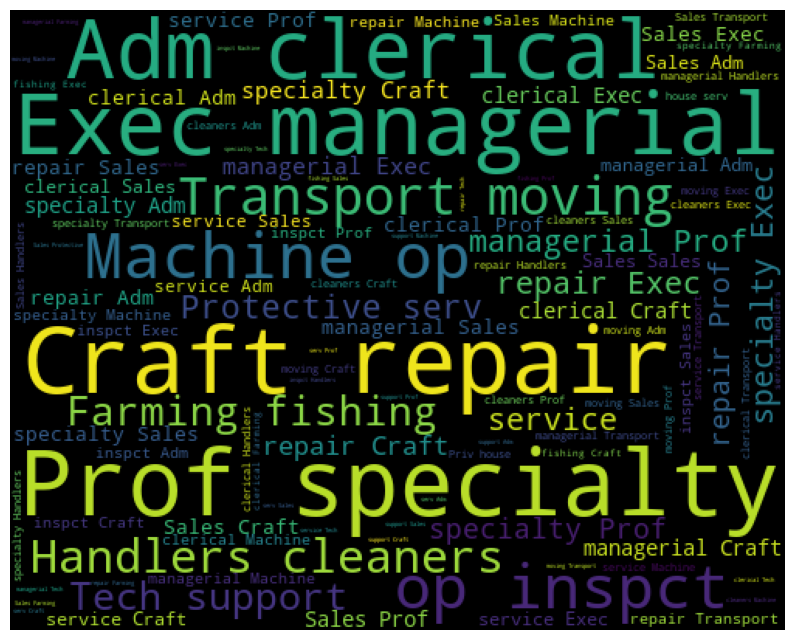

In [16]:
from wordcloud import WordCloud
from scipy import signal
occupation = df.occupation.dropna(False)
plt.subplots(figsize=(10,9))
wordcloud = WordCloud(background_color = 'black',
 width = 500,
 height = 400).generate(' '.join(occupation))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()


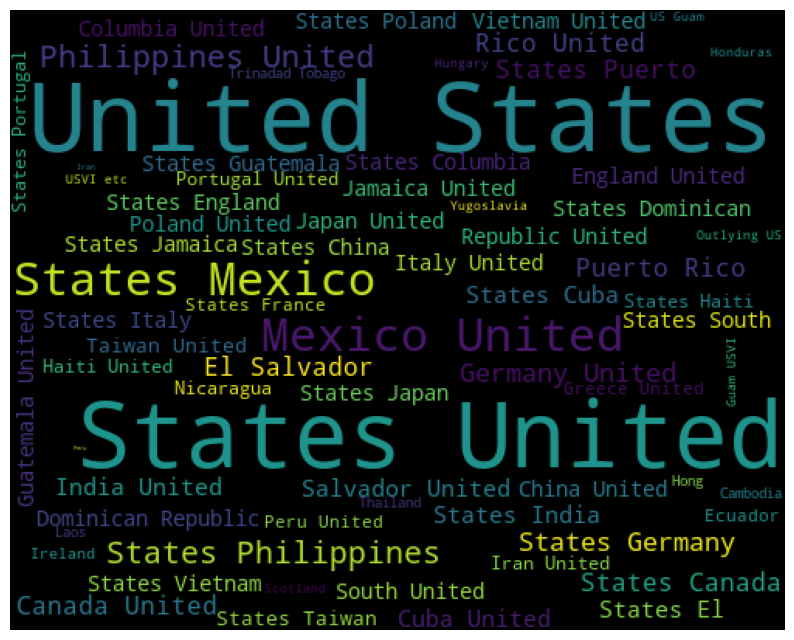

In [17]:
from wordcloud import WordCloud
from scipy import signal
country = df["native-country"].dropna(False)
plt.subplots(figsize=(10,9))
wordcloud = WordCloud(background_color = 'black',
 width = 500,
 height = 400).generate(' '.join(country))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

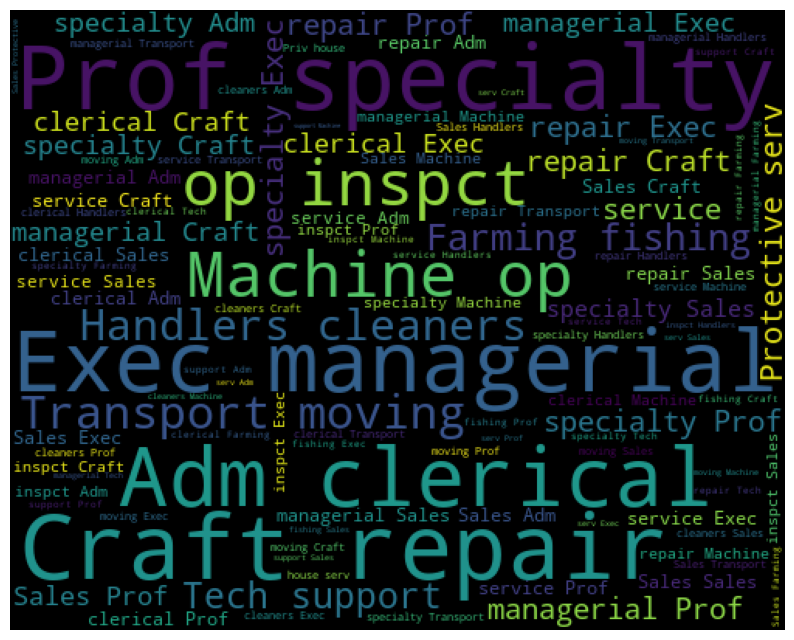

In [18]:
from wordcloud import WordCloud
from scipy import signal
occupation = df.occupation.dropna(False)
plt.subplots(figsize=(10,9))
wordcloud = WordCloud(background_color = 'black',
 width = 500,
 height = 400).generate(' '.join(occupation))
plt.axis('off')
plt.imshow(wordcloud) 
plt.show()

as we can see the null values features is having string data type

lets visualize the null values using heat map

<Axes: >

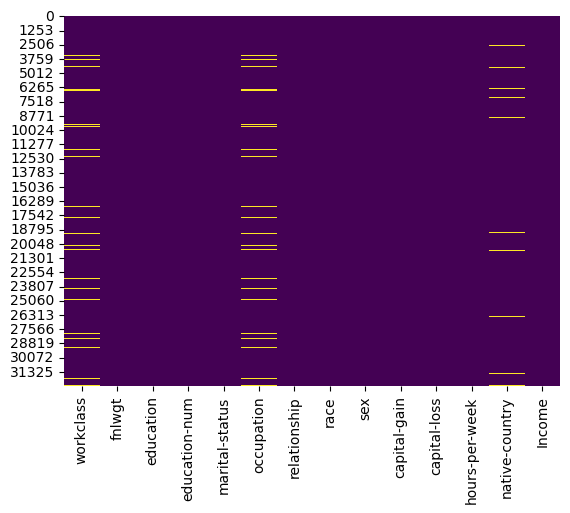

In [19]:
sns.heatmap(df.isnull(),cbar=False,cmap="viridis")

lets replace the values with most repeated values in the feature

In [20]:
feature_1 = "workclass"
df[feature_1].fillna(df[feature_1].mode()[0], inplace=True)


In [21]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

the work class feature has been replaced

In [22]:
feature_2 = "occupation"
df[feature_2].fillna(df[feature_2].mode()[0], inplace=True)

In [23]:
df["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

now occupation feature

In [24]:
feature_3 = "native-country"
df[feature_3].fillna(df[feature_3].mode()[0], inplace=True)

In [25]:
df["native-country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

and so native-country

now lets check the null values again

In [26]:
df.isnull().sum()

workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

we can not see any null values now

In [27]:
df.describe()

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [28]:
df["native-country"].value_counts()

 United-States                 29753
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

just checking which country has the most respondents

### now we are comparing each feature with our target variable which is the income

lets check the correlation between diffrent variables

In [29]:
df.describe()

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<Axes: >

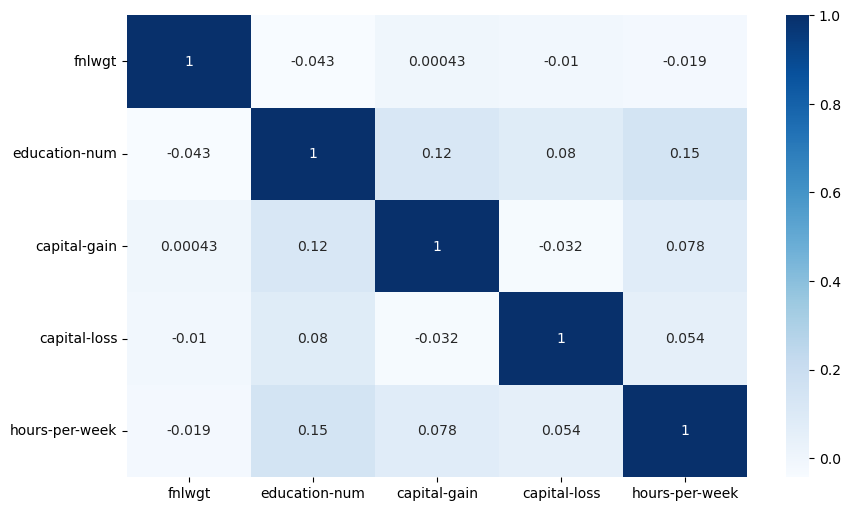

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cbar = True,annot = True,cmap = "Blues")

#### positive correlation


- capital_gain = hours_per_week
- capital_loss = hours_per_week
- hours_per_week = capital_gain,captal_loss

### negative correlation

- education_num = fnlwgt


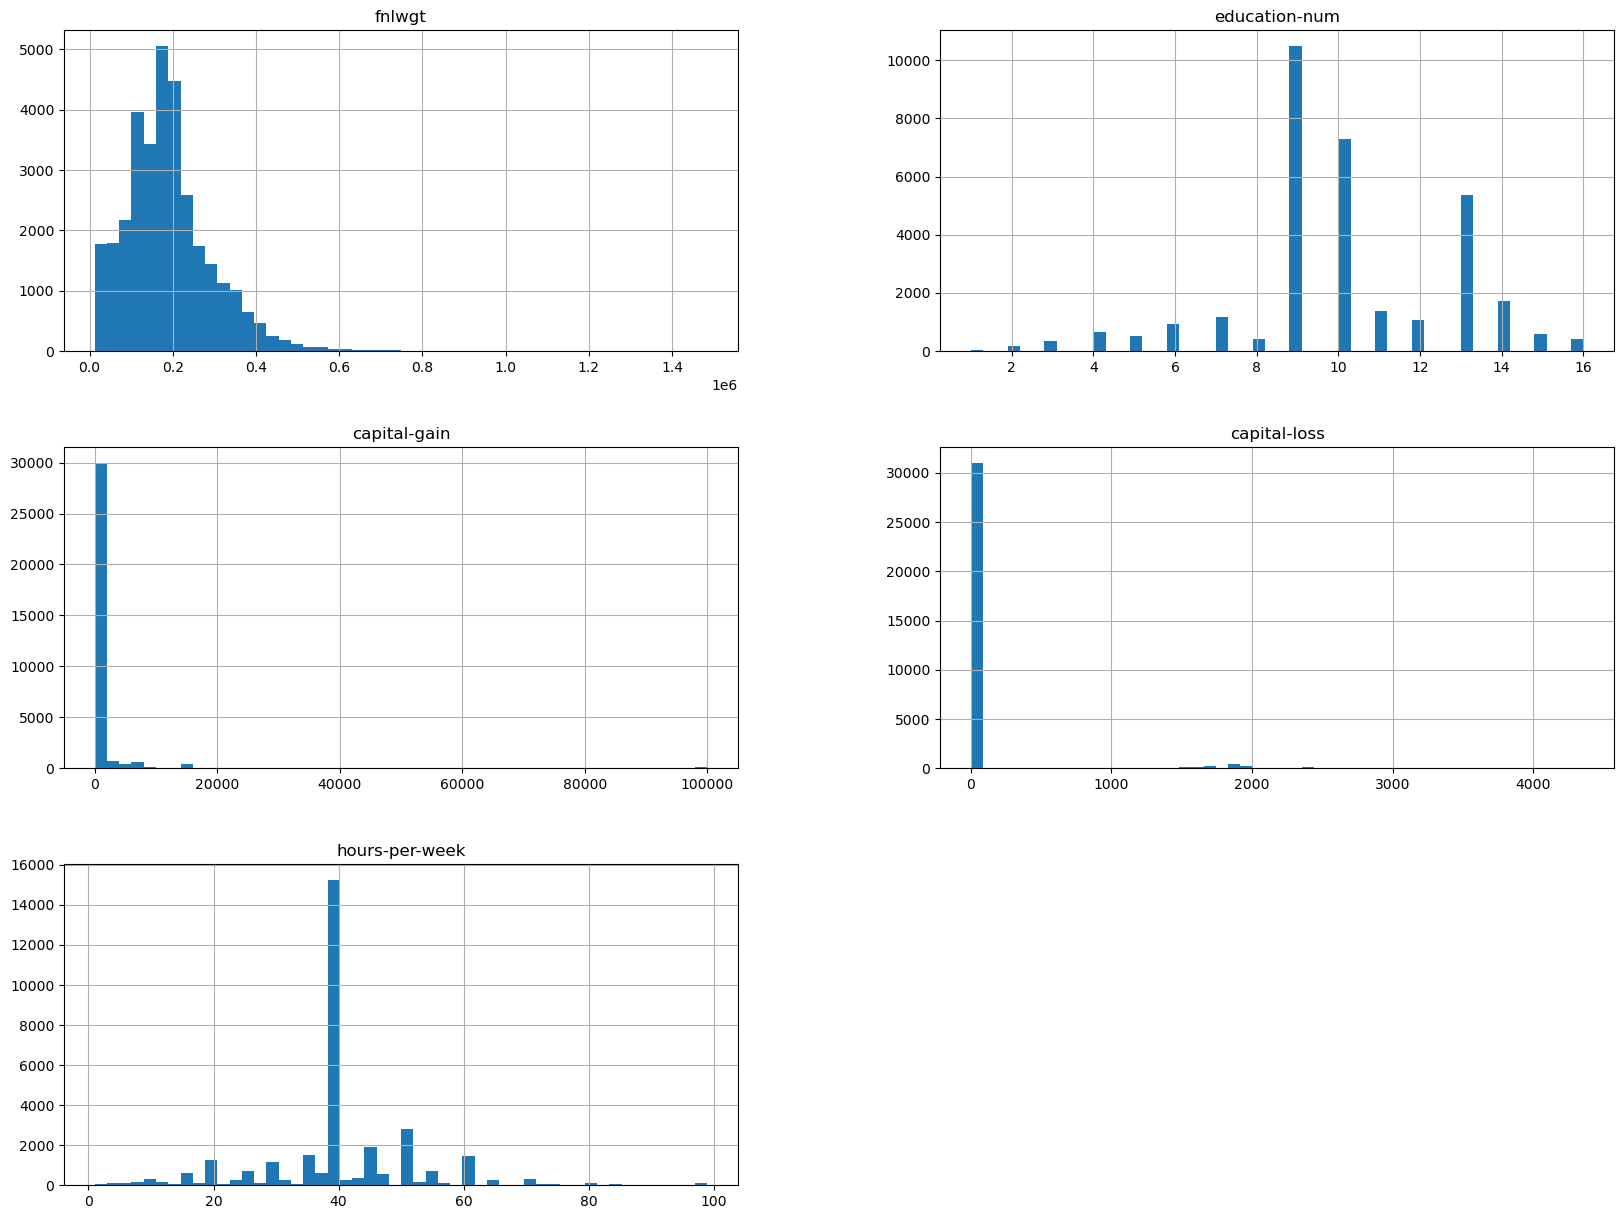

In [31]:
df.hist(bins=50,figsize = (20,15))
plt.show()

In [32]:
cols

Index(['workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'Income'],
      dtype='object')

#### how does marital status affect the price

Text(0, 0.5, 'Income')

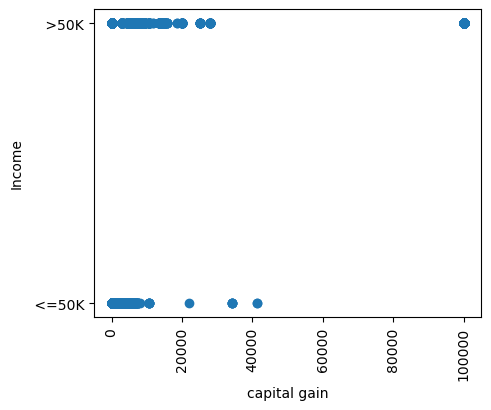

In [33]:
plt.figure(figsize=(5,4))
plt.scatter(x=df["capital-gain"],y=df["Income"])
plt.xticks(rotation=90)
plt.xlabel("capital gain")
plt.ylabel("Income")

we can see tha most of the capital loss values are lying between 0 - 3,000

lets see the univariate analysis of capital loss

<Axes: xlabel='capital-gain', ylabel='Count'>

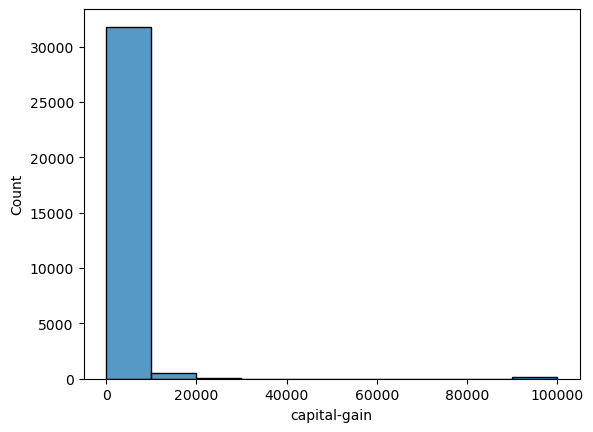

In [34]:
sns.histplot(df["capital-gain"],bins=10)

loss is low while we can see the plot 

### relation between fnlwgt and income

Text(0, 0.5, 'Income')

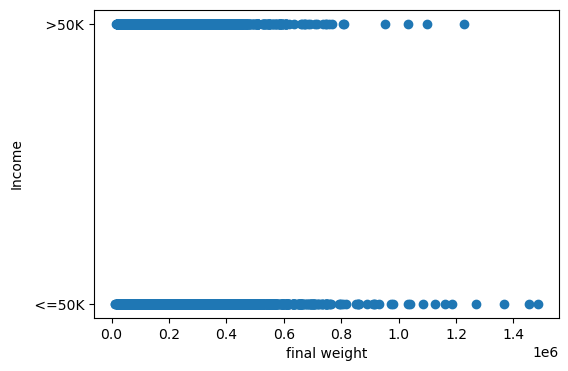

In [35]:
plt.figure(figsize=(6,4))
plt.scatter(x=df["fnlwgt"],y=df["Income"])
plt.xlabel("final weight")
plt.ylabel("Income")

<Axes: xlabel='fnlwgt', ylabel='Count'>

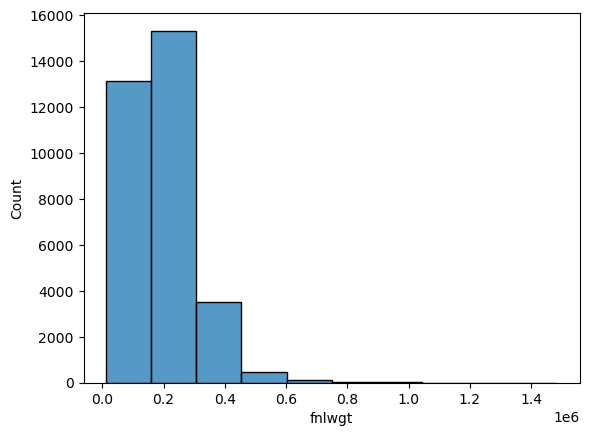

In [36]:
sns.histplot(df["fnlwgt"],bins=10)

In [37]:
df

,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


lets check the relation between education num (which is the period of education) and income

lets use boxplot

<Axes: xlabel='education-num', ylabel='Income'>

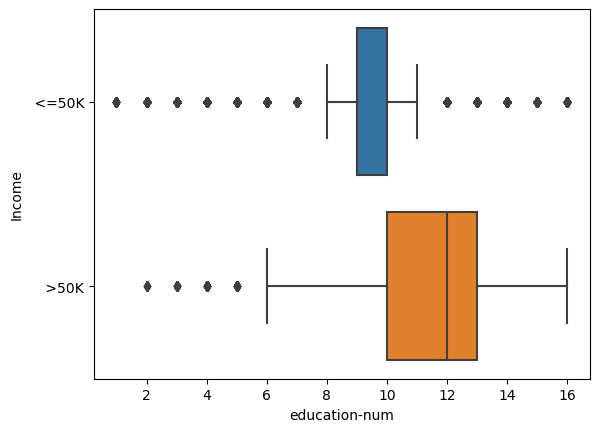

In [38]:
sns.boxplot(x=df["education-num"],y=df["Income"])

with this we can understand that the average education period of a person having above 50 k salary is 12

as if i done a mistake on dropping the nan data because i think its not relevant but actually it was the AGE of the certain person so i want to run it again

In [39]:
df = pd.read_csv("incomeData.csv.xls")
df

,nan,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


lets rename it

In [40]:
df.rename(columns={"nan" : "age"},inplace=True)

In [41]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


i want to replace the nan values same as i done before if there any

In [42]:
df["age"].isnull().sum()

0

In [43]:
df["age"].dtype

dtype('int64')

lets check whether there is any marking

In [44]:
df["age"].unique()


array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

there is no such markings as if we see 

i want to clear all the markings in whole data so let me re run the code

In [45]:
for col in  cols:
    df[col].replace({" ?":np.nan},inplace=True)

In [46]:
feature_1 = "workclass"
feature_2 = "occupation"
feature_3 = "native-country"
df[feature_1].fillna(df[feature_1].mode()[0], inplace=True)
df[feature_2].fillna(df[feature_1].mode()[0], inplace=True)
df[feature_3].fillna(df[feature_1].mode()[0], inplace=True)

lets check

In [47]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [48]:
df.to_csv("income_cleaned.csv")

In [49]:

df["native-country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Private',
       ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' England',
       ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy',
       ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador',
       ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [50]:
df["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Private', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [51]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

lets plot the age column

<Axes: xlabel='age', ylabel='Income'>

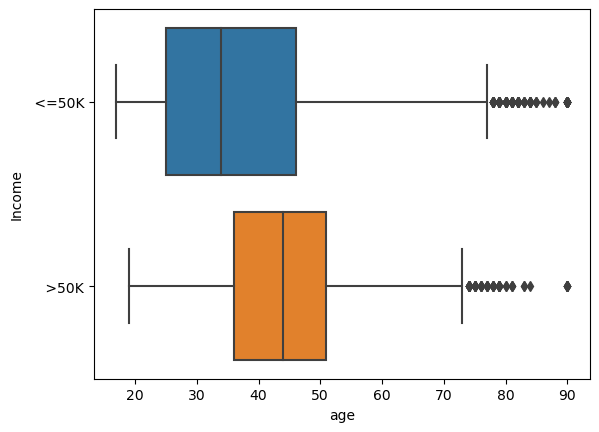

In [52]:
sns.boxplot(x=df["age"],y=df["Income"])

as if we see the above boxplot and recognise that 44-45 aged person having greater than 50 k salary

In [53]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<Axes: xlabel='education-num', ylabel='Income'>

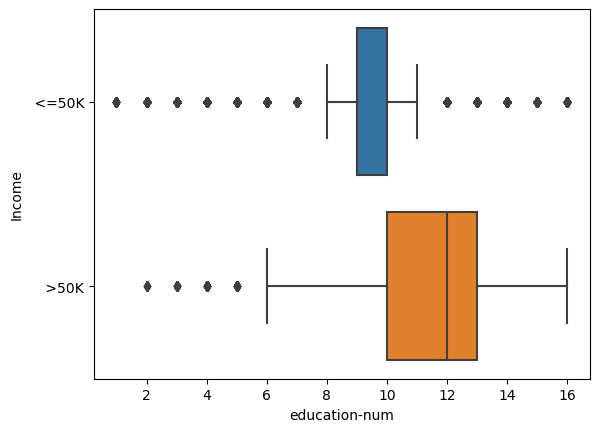

In [54]:
sns.boxplot(x=df["education-num"],y=df["Income"])

an average 12 years of education is having above 50 k salary

<Axes: xlabel='capital-loss', ylabel='Income'>

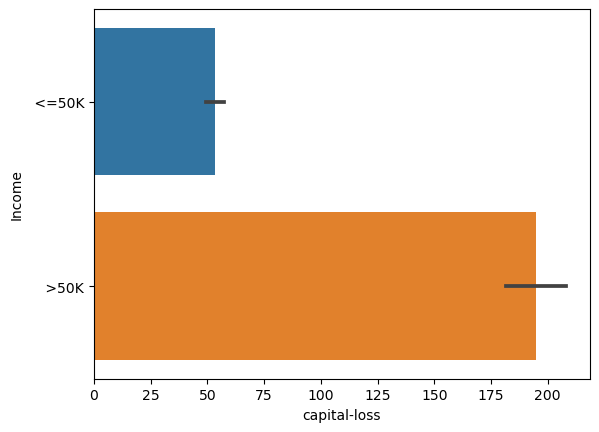

In [55]:
sns.barplot(x=df["capital-loss"],y=df["Income"])

In [56]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [57]:
cols

Index(['workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'Income'],
      dtype='object')

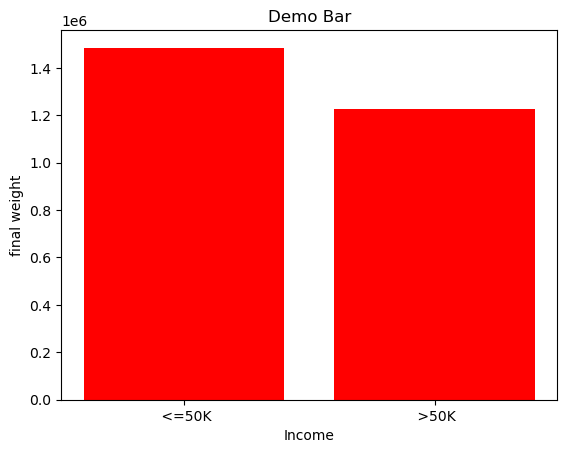

In [58]:
plt.bar(df["Income"],df["fnlwgt"],color="red")
plt.xlabel('Income')
plt.ylabel('final weight')
plt.title('Demo Bar')
plt.show()

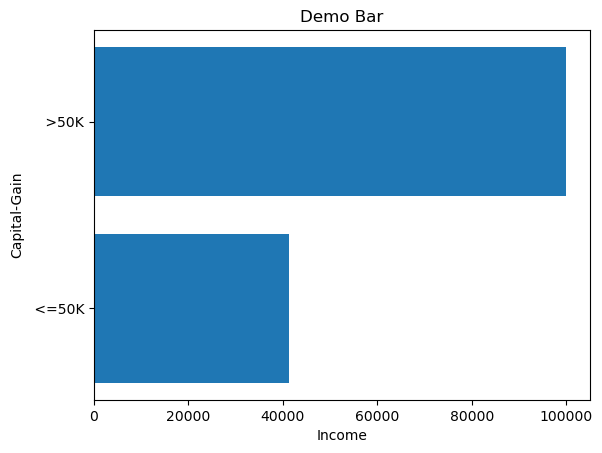

In [59]:
plt.barh(df["Income"],df["capital-gain"],align="center")
plt.xlabel('Income')
plt.ylabel('Capital-Gain')
plt.title('Demo Bar')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


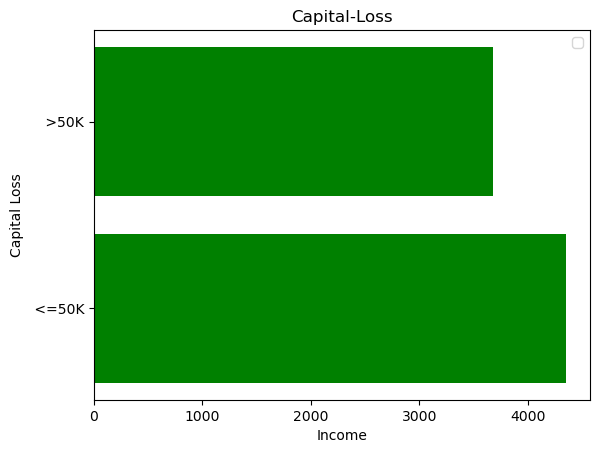

In [60]:

plt.barh(df["Income"],df["capital-loss"],align="center",color="green")
plt.xlabel("Income")
plt.ylabel("Capital Loss")
plt.title("Capital-Loss")
plt.legend()
plt.show()

In [61]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [62]:
pd.crosstab(df["education"], df["workclass"], values=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)


workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
education,,,,,,,,
10th,6,31,2,795,19,67,13,0
11th,9,36,1,1041,14,60,14,0
12th,5,19,0,373,7,19,10,0
1st-4th,0,4,0,148,2,13,1,0
5th-6th,1,9,0,296,4,19,4,0
7th-8th,2,28,1,496,14,94,10,1
9th,3,23,0,438,10,34,6,0
Assoc-acdm,55,88,0,776,35,71,41,1
Assoc-voc,38,86,0,1066,38,108,46,0


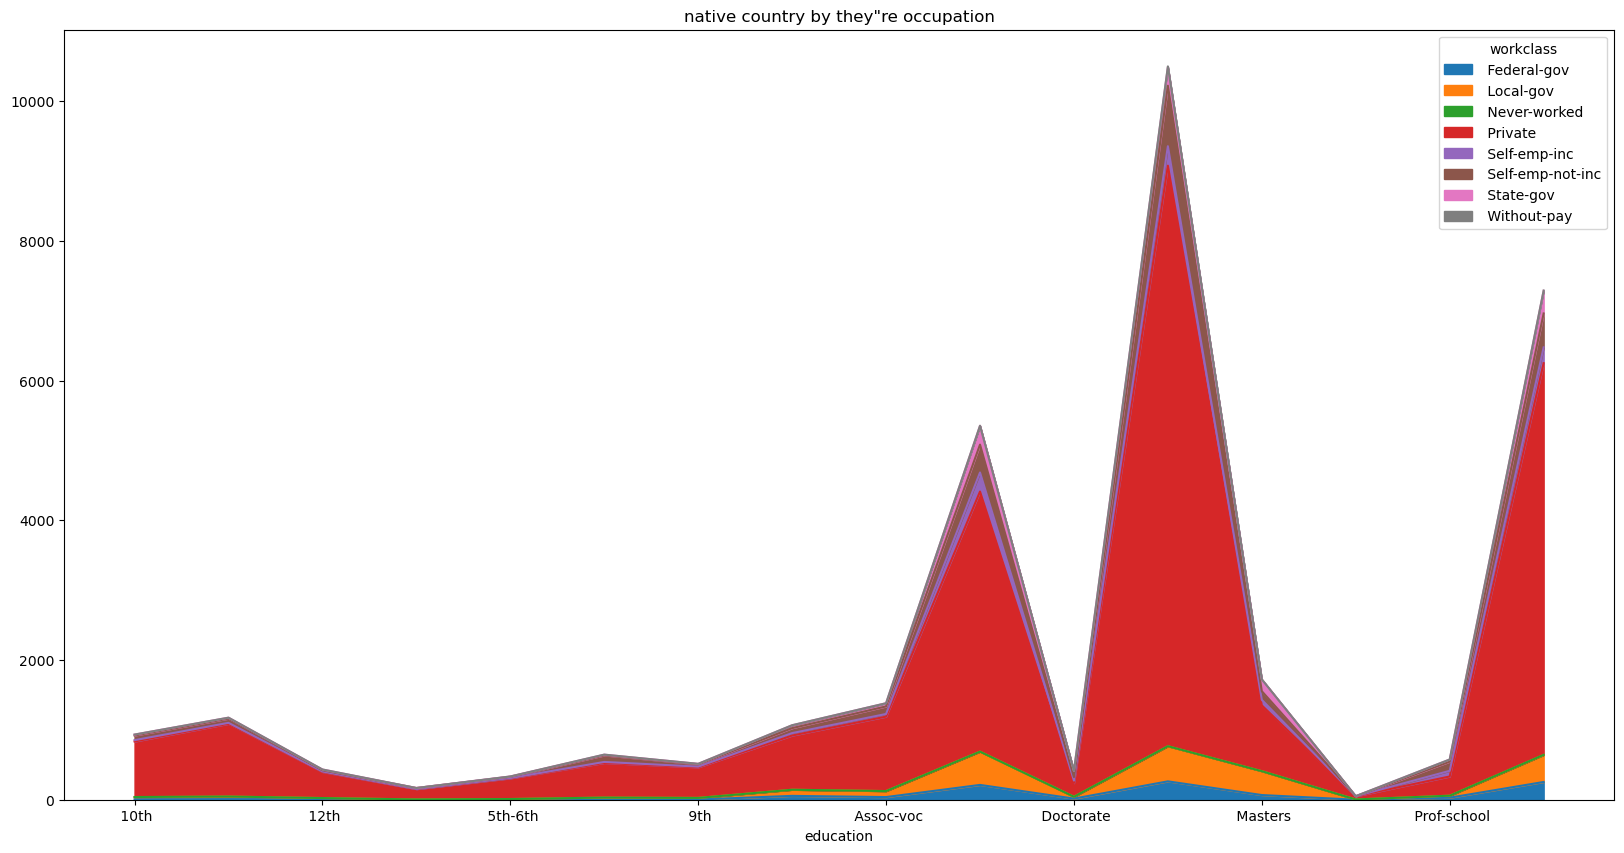

In [63]:

pd.crosstab(df["education"], df.workclass).plot(kind='area',figsize=(20,10))
plt.title('native country by they"re occupation')

plt.show()

we can see in the contingency table and the contingency table graph private sector has the most count which indicates that all typed educated persons are working in the private sector

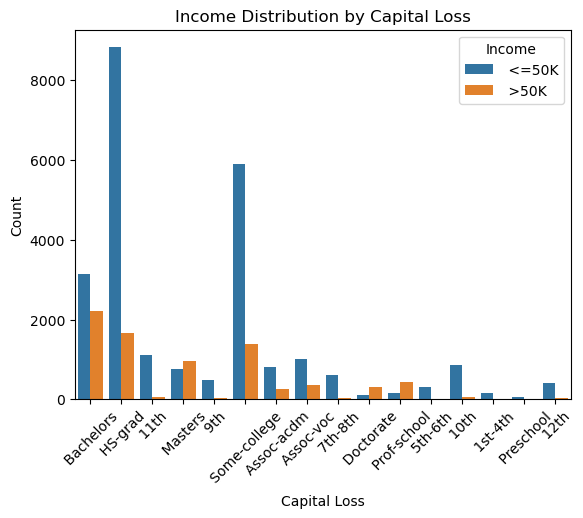

<function seaborn.categorical.countplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, ax=None, **kwargs)>

In [64]:
sns.countplot(x="education",hue="Income",data=df)
plt.title("Income Distribution by Capital Loss")
plt.xlabel("Capital Loss")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Income",loc="upper right")
plt.show()

sns.countplot

In [65]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [66]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [67]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [68]:
df["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [69]:
df["marital-status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [70]:
df["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Private', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [71]:
df.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [72]:
df.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [73]:
df.sex.unique()

array([' Male', ' Female'], dtype=object)

In [74]:
df["native-country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Private',
       ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' England',
       ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy',
       ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador',
       ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

so here we see  all the feature is categorical 

In [75]:
df["sex"].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

# Lets Encode the Data 

In [76]:
from sklearn import preprocessing

In [77]:
x = df.copy()

In [78]:
lab_enc = preprocessing.LabelEncoder()

In [79]:
for col in x:
    x[col]=lab_enc.fit_transform(x[col].values)

In [80]:
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,22,6,2671,9,12,4,0,1,4,1,25,0,39,39,0
1,33,5,2926,9,12,2,3,0,4,1,0,0,12,39,0
2,21,3,14086,11,8,0,5,1,4,1,0,0,39,39,0
3,36,3,15336,1,6,2,5,0,2,1,0,0,39,39,0
4,11,3,19355,9,12,2,10,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,3,16528,7,11,2,13,5,4,0,0,0,37,39,0
32557,23,3,8080,11,8,2,6,0,4,1,0,0,39,39,1
32558,41,3,7883,11,8,6,0,4,4,0,0,0,39,39,0
32559,5,3,12881,11,8,4,0,3,4,1,0,0,19,39,0


In [81]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x.iloc[:,0:-1], x['Income'])

print('Original dataset shape', len(x))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 32561
Resampled dataset shape 49440


## the data has been encoded to numerical

In [82]:
y_smote.value_counts()

0    24720
1    24720
Name: Income, dtype: int64

In [83]:
x_smote

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,22,6,2671,9,12,4,0,1,4,1,25,0,39,39
1,33,5,2926,9,12,2,3,0,4,1,0,0,12,39
2,21,3,14086,11,8,0,5,1,4,1,0,0,39,39
3,36,3,15336,1,6,2,5,0,2,1,0,0,39,39
4,11,3,19355,9,12,2,10,5,2,0,0,0,39,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49435,16,5,18610,9,11,2,12,0,4,1,0,0,49,36
49436,34,3,4745,15,9,2,2,0,4,1,0,0,40,39
49437,36,4,18177,9,12,2,10,0,4,1,0,0,45,39
49438,29,1,8696,14,8,2,13,0,4,1,0,41,39,39


In [84]:
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,22,6,2671,9,12,4,0,1,4,1,25,0,39,39,0
1,33,5,2926,9,12,2,3,0,4,1,0,0,12,39,0
2,21,3,14086,11,8,0,5,1,4,1,0,0,39,39,0
3,36,3,15336,1,6,2,5,0,2,1,0,0,39,39,0
4,11,3,19355,9,12,2,10,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,3,16528,7,11,2,13,5,4,0,0,0,37,39,0
32557,23,3,8080,11,8,2,6,0,4,1,0,0,39,39,1
32558,41,3,7883,11,8,6,0,4,4,0,0,0,39,39,0
32559,5,3,12881,11,8,4,0,3,4,1,0,0,19,39,0


now lets split them to training and testing Data

In [85]:
X = x_smote
Y = y_smote


In [86]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [95]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
49435    1
49436    1
49437    1
49438    1
49439    1
Name: Income, Length: 49440, dtype: int32

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
log_reg = LogisticRegression()

In [89]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [90]:
x_train_pred = log_reg.predict(x_train)

In [91]:
x_train_pred

array([1, 1, 1, ..., 1, 0, 1])

lets check the accuracy 

In [92]:
from sklearn.metrics import accuracy_score


In [93]:
test_accuracy_score = accuracy_score(y_train,x_train_pred)

In [118]:
test_accuracy_score

0.7342485841423948

# now lets do it using pipeline 

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [120]:
regression_pipeline = Pipeline([("scaler",StandardScaler()),("regressor",LogisticRegression())])

In [121]:
regression_pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LogisticRegression())])

this is the regression model using the pipeline

In [122]:
regression_pipeline.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LogisticRegression())])

In [123]:
y_pred = regression_pipeline.predict(x_test)

In [124]:
y_pred

array([0, 0, 1, ..., 1, 0, 0])

now lets check the accuracy 

In [125]:
acc = accuracy_score(y_test,y_pred)
acc

0.7735639158576052